# Customer Segmentation

## Problem Statement

A marketing team made a mistake with the customer profiles so their campaigns haven't been working well
The goal is helping them better understand our customers using data and provide a full report to the marketing team about our customers and their preferences.

### Import the relevant libraries and the files

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [2]:
# Loading the dataset
path_data = '../Data/Campaign_data.csv'
campaign_data = pd.read_csv(path_data)

# Exploring the dataset
# Set the display options to show all columns
pd.options.display.max_columns = None
print("Dataframe shape is:", campaign_data.shape)
campaign_data.head()

Dataframe shape is: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# Continue dataset exploration 
campaign_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1976.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1967.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1985.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Project Plan

1. Data exploration, cleaning
2. Feature engineering
3. Data preprocessing
4. Clustering
5. Model evaluation
6. Profiling
7. Creating a report

#### 1. Data exploration, cleaning

In [4]:
#Check information about the data
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

For the missing values, we can drop the rows with missing income because the number of these rows is about 1% of all dataset. Not significant.

In [6]:
# To remove the NA values
campaign_data = campaign_data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(campaign_data))

The total number of data-points after removing the rows with missing values are: 2216


We must ensure that Dt_Customer has the correct data type

In [7]:
# Formatting date 
campaign_data["Dt_Customer"] = pd.to_datetime(campaign_data["Dt_Customer"], format="%d-%m-%Y")

In [7]:
# Verify if work was completed correctly
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

#### 2. Feature engineering

Working with non-categorical variables.

Create an Age column and define age group

In [8]:
# Calculate the age of each customer
campaign_data['Age'] = 2022 - campaign_data['Year_Birth']

In [9]:
# Define age groups
def age_group(age):
    if 18 <= age <= 24:
        return 'Young Adults'
    elif 25 <= age <= 34:
        return 'Early Adulthood'
    elif 35 <= age <= 44:
        return 'Midlife'
    elif 45 <= age <= 54:
        return 'Middle Age'
    elif 55 <= age <= 64:
        return 'Pre-retirement'
    else:
        return 'Retirement Age'

In [10]:
# Create a new 'Age_Range' feature. 
campaign_data['Age_Range'] = campaign_data['Age'].apply(age_group)

We engineer the customer tenure feature in days

In [11]:
# Customer tenure
dt_customer = campaign_data['Dt_Customer']
dataset_date = datetime(2022, 12, 31)
 
# Calculate the customer tenure for each customer
customer_tenure = dataset_date - dt_customer
 
# Convert the customer tenure to days and create a new 'Customer_For' feature.
campaign_data['Customer_For'] = customer_tenure / np.timedelta64(1, 'D')

We add Website conversion rate feature


In [12]:
# Calculate WebConversionRate
campaign_data['WebConversionRate'] = np.where(campaign_data['NumWebVisitsMonth'] != 0, campaign_data['NumWebPurchases']/campaign_data['NumWebVisitsMonth'], 0)

We create Total_Spent feature

In [13]:
# Calculate the total spent for each customer
campaign_data['Total_Spent'] = campaign_data['MntWines'] + campaign_data['MntFruits'] + campaign_data['MntMeatProducts'] + campaign_data['MntFishProducts'] + campaign_data['MntSweetProducts'] + campaign_data['MntGoldProds']

We create the total number of purchases

In [14]:
# Calculate total number of purchases
campaign_data['Total_Purchases'] = campaign_data['NumWebPurchases'] + campaign_data['NumCatalogPurchases'] + campaign_data['NumStorePurchases']

Rework categorical variables

In [15]:
# Explore the Marital_Status feature
print("Total categories in the feature Marital_Status:\n", campaign_data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



The current format of the data is not helpful for analysis. We create four new features from the Marital Status variable to improve the analysis.

In [16]:
# Deriving number of adults in household by marital status
campaign_data["Adults"]=campaign_data["Marital_Status"].replace({"Married":2, "Together":2,"Single":1, "Divorced":1, "Widow":1, "Alone":1, "Absurd":1,  "YOLO":1})
 
# Feature indicating total dependents living in the household
campaign_data["Dependents"]=campaign_data["Kidhome"]+campaign_data["Teenhome"]
 
# Now we calculate Household size 
campaign_data["Household_size"] = campaign_data["Adults"] + campaign_data["Dependents"]
 
# Feature pertaining parenthood
campaign_data["Is_Parent"] = np.where(campaign_data.Dependents> 0, 1, 0)

In [17]:
print("Total categories in the feature Education:\n", campaign_data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [18]:
# Calculate the average income for each education category
avg_income_by_education = campaign_data.groupby('Education')['Income'].mean()
# Print the result
print(avg_income_by_education)

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


In [19]:
# Calculate the average spent for each education category
avg_spent_by_education = campaign_data.groupby('Education')['Total_Spent'].mean()
# Print the result
print(avg_spent_by_education)

Education
2n Cycle      494.930000
Basic          81.796296
Graduation    621.686380
Master        609.767123
PhD           676.733888
Name: Total_Spent, dtype: float64


Go ahead and replace "Graduation" and "Master" with "Postgraduate."

In [20]:
# Updating category
campaign_data["Education"]=campaign_data["Education"].replace({"Graduation":"Postgraduate", "Master":"Postgraduate"})

Deal with multiple boolean features

In [21]:
# Feature indicating total accepted offers
campaign_data["Offers_Accepted"] = campaign_data["AcceptedCmp1"] + campaign_data["AcceptedCmp2"] + campaign_data["AcceptedCmp3"] + campaign_data["AcceptedCmp4"]+campaign_data["AcceptedCmp5"]+campaign_data["Response"]

Drop redundant features and rename existing features for convenience

In [22]:
# Use the function to_drop to get rid of them.
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID", "Kidhome", "Teenhome"]
campaign_data = campaign_data.drop(to_drop, axis=1)

Rename features for clarity

In [23]:
# 4.2 Rename features for clarity
campaign_data=campaign_data.rename(columns={"MntWines": "Wine","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                                            "MntGoldProds":"Gold","AcceptedCmp1":"Promo1", "AcceptedCmp2":"Promo2", "AcceptedCmp3":"Promo3",
                                            "AcceptedCmp4":"Promo4", "AcceptedCmp5":"Promo5", "Response":"Promo6","NumCatalogPurchases":"Catalog",
                                           "NumWebPurchases":"Web", "NumDealsPurchases":"DealsPurchases", "NumStorePurchases":"Store", "NumWebVisitsMonth":"WebVisits"})

Deal with outliers

In [63]:
# Take a look at the data's stats.
campaign_data.describe()

,Income,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,DealsPurchases,Web,Catalog,Store,WebVisits,Promo3,Promo4,Promo5,Promo1,Promo2,Complain,Z_CostContact,Z_Revenue,Promo6,Age,Customer_For,WebConversionRate,Total_Spent,Total_Purchases,Adults,Dependents,Household_size,Is_Parent,Offers_Accepted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,45.179603,538.521209,1.077581,607.075361,12.557310,1.645307,0.947202,2.592509,0.714350,0.448556
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,202.434667,1.212385,602.900476,7.204611,0.478528,0.749062,0.905722,0.451825,0.892440
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,185.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,365.000000,0.333333,69.000000,6.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,540.500000,0.750000,396.500000,12.000000,2.000000,1.000000,3.000000,1.000000,0.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,714.000000,1.500000,1048.000000,18.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,884.000000,27.000000,2525.000000,32.000000,2.000000,3.000000,5.000000,1.000000,5.000000


The stats show some discrepancies in mean Age and Income and max Age and Income.

In [64]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   object 
 1   Income             2216 non-null   float64
 2   Recency            2216 non-null   int64  
 3   Wine               2216 non-null   int64  
 4   Fruits             2216 non-null   int64  
 5   Meat               2216 non-null   int64  
 6   Fish               2216 non-null   int64  
 7   Sweets             2216 non-null   int64  
 8   Gold               2216 non-null   int64  
 9   DealsPurchases     2216 non-null   int64  
 10  Web                2216 non-null   int64  
 11  Catalog            2216 non-null   int64  
 12  Store              2216 non-null   int64  
 13  WebVisits          2216 non-null   int64  
 14  Promo3             2216 non-null   int64  
 15  Promo4             2216 non-null   int64  
 16  Promo5             2216 

Do quick visual data exploration

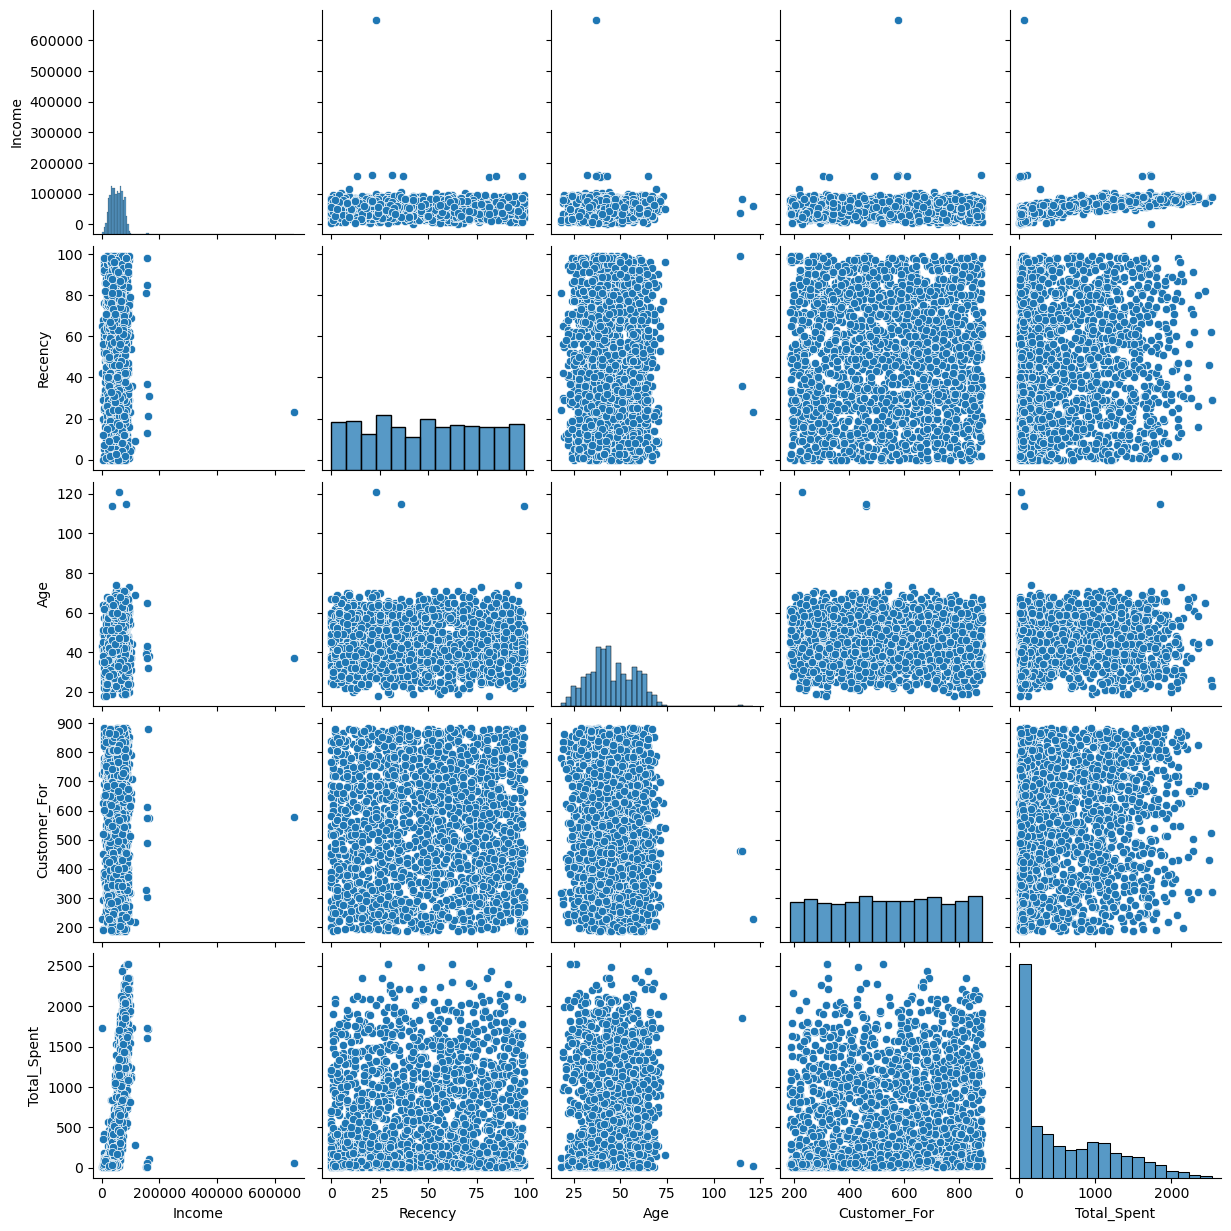

In [24]:
# Select columns to plot
selected_columns = campaign_data[["Income", "Recency", "Age", "Customer_For", "Total_Spent"]]
 
# Create a pairplot using Seaborn with a visually appealing color palette
sns.pairplot(selected_columns)
 
# Display the plot using matplotlib.pyplot
plt.show()

It is clear now that you have outliers in Age and Income features. Remove them.

Remove outliers

In [25]:
# Dropping the outliers by setting a cap on Age and income. 
campaign_data = campaign_data[(campaign_data["Age"]<100)]
campaign_data = campaign_data[(campaign_data["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(campaign_data))

The total number of data-points after removing the outliers are: 2212


#### 3. Data preprocessing

Define the features to use for clustering - Drop non-numeric columns

In [26]:
numeric_campaign_data = campaign_data.select_dtypes(include=np.number)

Drop columns that were summarized during the Feature Engineering step.

In [27]:
to_drop1 = ['Promo1', 'Promo2', 'Promo3', 'Promo4', 'Promo5', 'Promo6', 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store']
numeric_campaign_data = numeric_campaign_data.drop(to_drop1, axis=1)

We calculate the top features affecting the number of accepted promotions

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
 
X = numeric_campaign_data.drop('Offers_Accepted', axis=1)
y = numeric_campaign_data['Offers_Accepted']
 
num_top_features = 5
selector = SelectKBest(mutual_info_classif, k=num_top_features)
selector.fit(X, y)
 
selected_features = X.columns[selector.get_support()]
print(f"Top {num_top_features} features based on mutual information:")
print(selected_features)

Top 5 features based on mutual information:
Index(['Income', 'WebConversionRate', 'Total_Spent', 'Total_Purchases',
       'Is_Parent'],
      dtype='object')


Select features for scaling

In [29]:
campaign_data_scale = numeric_campaign_data[['Income', 'Total_Purchases', 'WebConversionRate', 'Total_Spent', 'Offers_Accepted']]

Scale the data

Visualize the distribution of each feature

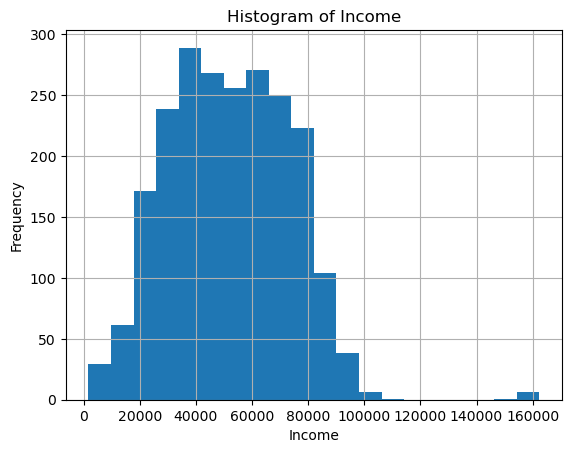

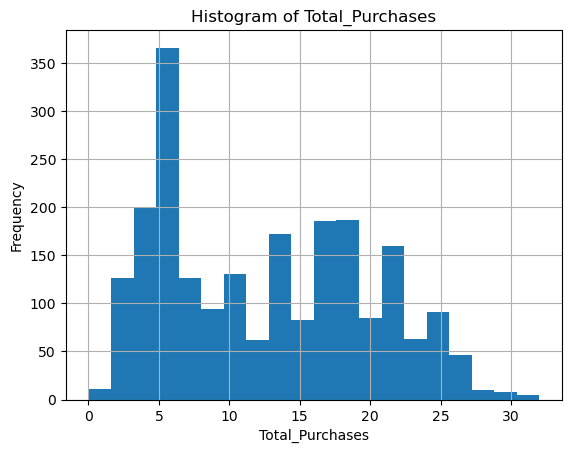

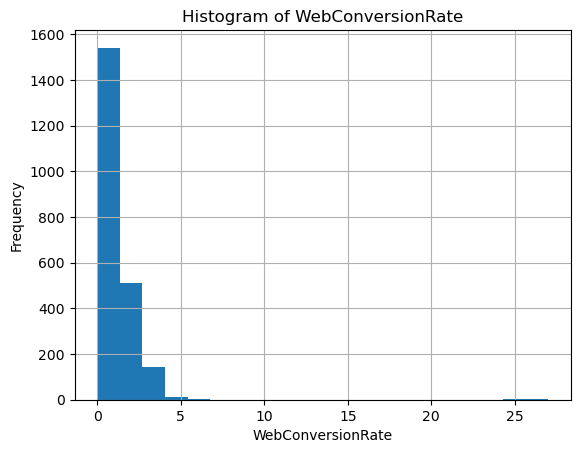

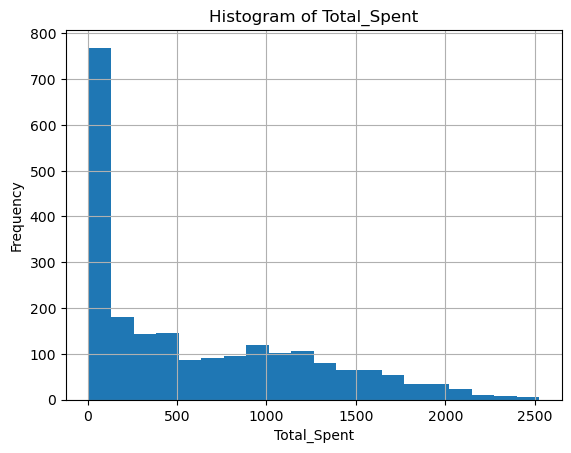

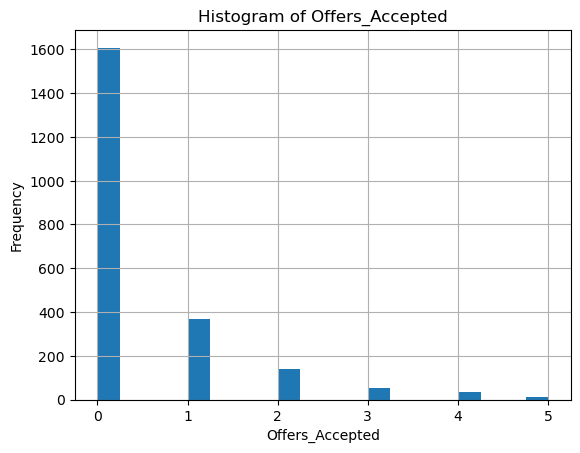

In [30]:
for column in campaign_data_scale.columns:
    plt.figure()
    campaign_data_scale[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Create lists of Gaussian and non-Gaussian features

In [31]:
gaussian_features = ['Income']
non_gaussian_features = ['Total_Purchases', 'Total_Spent', 'Offers_Accepted', 'WebConversionRate']

Create transformers

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
preprocessor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), gaussian_features),
        ('minmax_scaler', MinMaxScaler(), non_gaussian_features)
    ], remainder='passthrough')

Fit and transform the numerical data

In [33]:
campaign_data_scaled = preprocessor.fit_transform(campaign_data_scale)

 Convert the scaled_numeric_data array to a DataFrame

In [34]:
campaign_data_scaled = pd.DataFrame(campaign_data_scaled, columns=gaussian_features + non_gaussian_features)

Check the results

In [80]:
campaign_data_scaled.describe()

,Income,Total_Purchases,Total_Spent,Offers_Accepted,WebConversionRate
count,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000
mean,-1.146141e-16,0.392716,0.238995,0.089783,0.039896
std,1.000226e+00,0.225170,0.239093,0.178603,0.044875
min,-2.333791e+00,0.000000,0.000000,0.000000,0.000000
25%,-7.771113e-01,0.187500,0.025397,0.000000,0.012346
50%,-2.731156e-02,0.375000,0.155556,0.000000,0.027778
75%,7.679525e-01,0.570312,0.413889,0.200000,0.055556
max,5.131311e+00,1.000000,1.000000,1.000000,1.000000


#### 4. Clustering

Installing required packages.

pip install yellowbrick

In [35]:
# Now we need to import KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

Finding the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


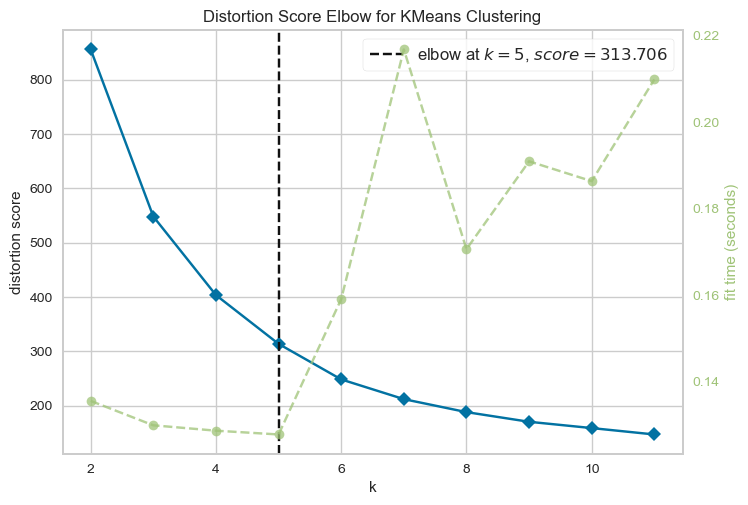

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Quick examination of elbow method to find the number of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(campaign_data_scaled)
Elbow_M.show()

Clustering using the K-means algorithm

we'll perform clustering using the K-means algorithm

In [37]:
# Number of clusters
num_clusters = 5
 
# Set a seed for reproducibility
random_seed = 18
 
# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed)
 
# Fit the model to the data
kmeans.fit(campaign_data_scaled)
 
# Get the cluster assignments for each data point
clusters = kmeans.predict(campaign_data_scaled)

 Add the cluster assignments as a new column in the original dataframe

In [39]:
# Add the cluster assignments as a new column in the original dataframe
campaign_data["cluster"] = clusters

# Save dataframe as csv
path = 'C:/Portfolio/clustering/Data/data_clustered.csv'
campaign_data.to_csv(path, index=False)

#### 5. Model evaluation

Assessment of clusters distribution in 3D space

In [40]:
# Create a colormap
mycolormap = ["#F57C00", "#1976D2", "#E53935", "#43A047", "#8E24AA"]
 
# Create a custom color sequence for the clusters
color_sequence = px.colors.qualitative.Plotly[:len(campaign_data['cluster'].unique())]
colormap = mycolormap
 
fig = px.scatter_3d(campaign_data, x='Income', y='Customer_For', z='Total_Spent',
                    color='cluster', color_discrete_map=colormap,
                    opacity=1, height=800, width=800)
 
fig.update_traces(marker=dict(size=6, line=dict(width=1)), selector=dict(mode='markers'))
 
fig.update_layout(scene=dict(xaxis_title='Income', xaxis_title_font=dict(color='black'),
                             yaxis_title='Customer_For', yaxis_title_font=dict(color='black'),
                             zaxis_title='Total_Spent', zaxis_title_font=dict(color='black')),
                  title='The Plot of the Clusters',
                  font=dict(family="Gilroy", color='black', size=12))
 
fig.show()

Clusters assessment in 2D space by Income and Total Spent

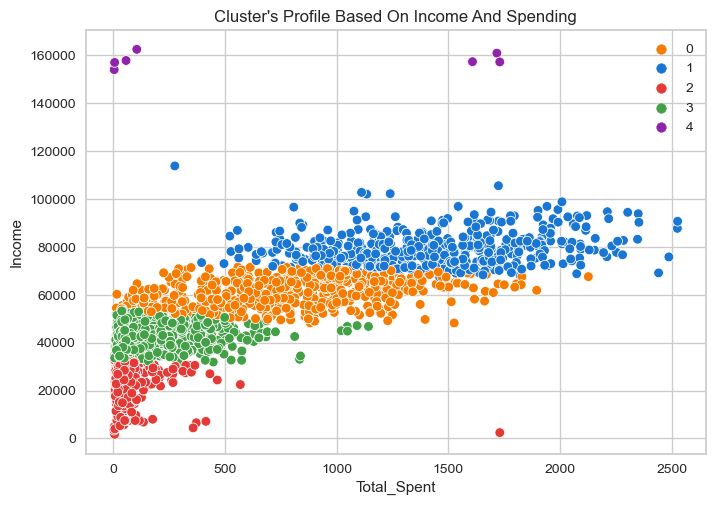

In [41]:
pl = sns.scatterplot(data = campaign_data, x=campaign_data["Total_Spent"], y=campaign_data["Income"], hue=campaign_data["cluster"], palette=mycolormap)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

#### Conclusion:

This chart confirms what you saw on the 3D plot. Clusters are very well distributed. Give a closer assessment of cluster 4 in the next step.

Plotting countplot of clusters

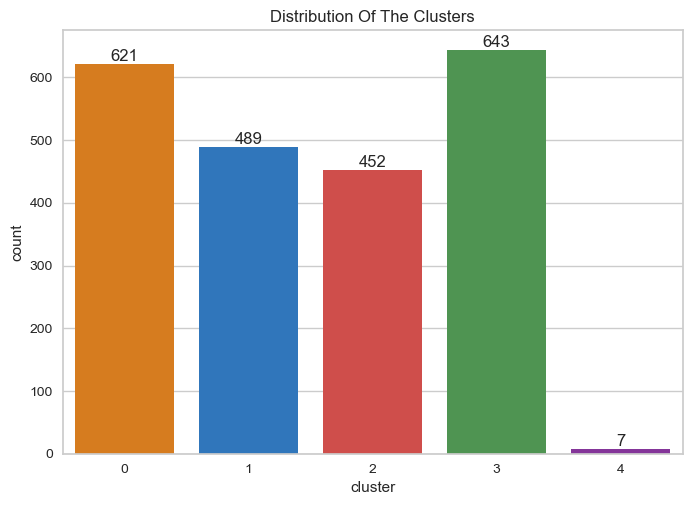

In [42]:
pal = mycolormap
pl = sns.countplot(x=campaign_data["cluster"], palette=pal)
pl.set_title("Distribution Of The Clusters")
# Add value labels to the bars
for i in pl.patches:
    pl.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='bottom', fontsize=12)
plt.show()

#### Conclusion:

The clusters are evenly distributed, except for cluster 4, which is better to filter out. Based on the chart above, this cluster provides no valuable information for the marketing team. The group only contains seven clients, and despite their high income, their spending is unevenly distributed

Drop cluster number 4 from the dataframe

In [43]:
# Drop cluster number 4
campaign_data.drop(campaign_data[campaign_data["cluster"] == 4].index, inplace=True)

# Update the palette
mycolormap = ["#F57C00", "#1976D2", "#E53935", "#43A047"]

#### 6. Profilng

**1. Offers accepted by each cluster**

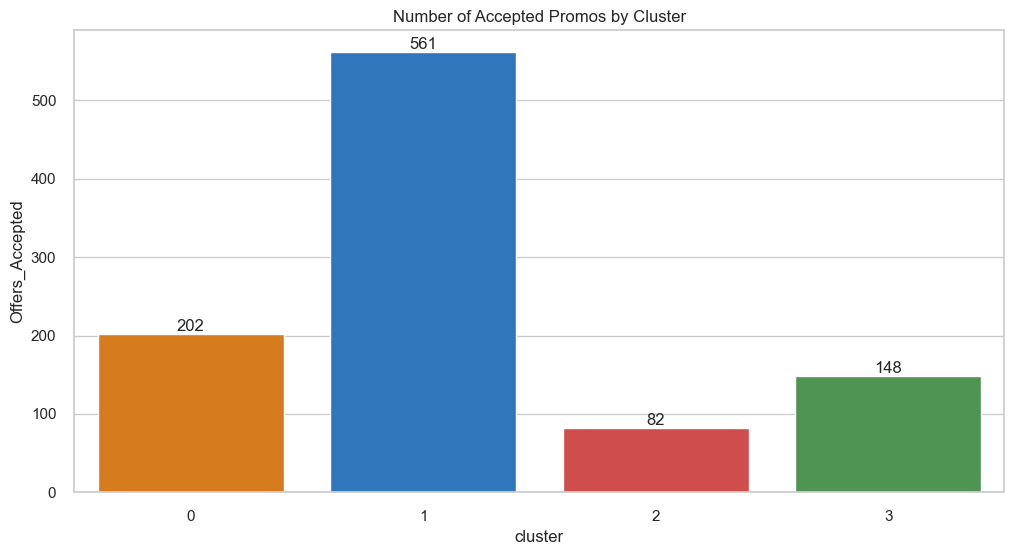

In [44]:
# Aggregate the data by cluster and sum the Offers_Accepted column
agg_data = campaign_data.groupby('cluster')['Offers_Accepted'].sum().reset_index()
 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Offers_Accepted", data=agg_data, palette=mycolormap)
ax.set_title("Number of Accepted Promos by Cluster")
 
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Offers_Accepted']}", (i, row['Offers_Accepted']), ha='center', va='bottom', fontsize=12)
 
plt.show()

Percentage spent from the total for each cluster

In [45]:
# Calculate the total number of accepted offers for all clusters
total_accepted_offers = agg_data['Offers_Accepted'].sum()
 
# Calculate the percentage of offers accepted by each cluster
agg_data['Acceptance_Percentage'] = (agg_data['Offers_Accepted'] / total_accepted_offers) * 100
 
# Display the results
print("Percentage of Accepted Offers by Cluster:")
for index, row in agg_data.iterrows():
    print(f"Cluster {row['cluster']}: {row['Acceptance_Percentage']:.2f}%")

Percentage of Accepted Offers by Cluster:
Cluster 0.0: 20.34%
Cluster 1.0: 56.50%
Cluster 2.0: 8.26%
Cluster 3.0: 14.90%


**_Insights: Offers accepted by each cluster_**

*Cluster 1 has the highest number of accepted offers (561) - 56.5% of total accepted proposals, indicating that it is the primary target group for the marketing team. The marketing team should tailor their promotional strategies to better target customers in Cluster 1. However, different approaches may be necessary for engaging with customers in Cluster 0. Additionally, this chart suggests that the clustering technique was chosen correctly since there is a defined group with the highest number of accepted promo campaigns.*

**2. Number of purchases made by each cluster**

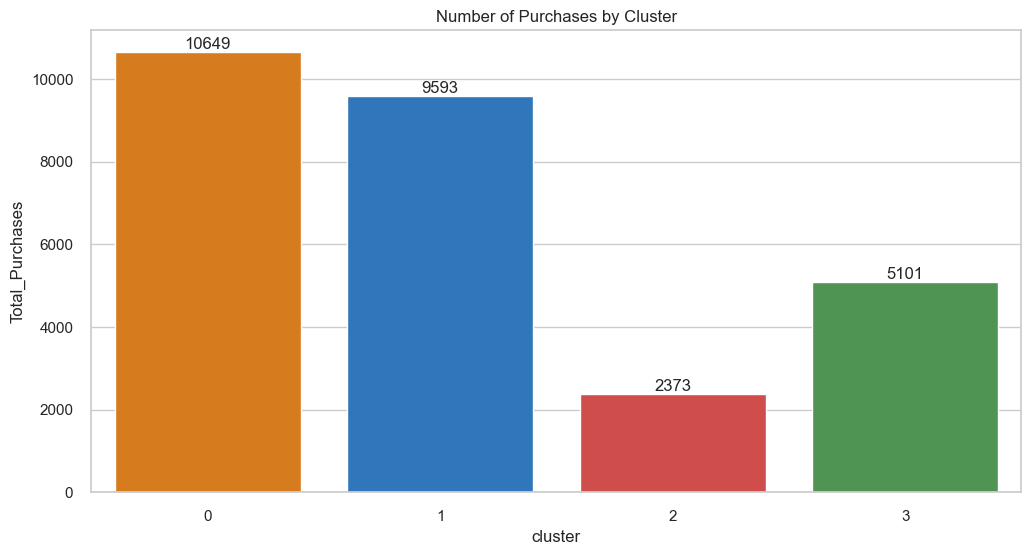

In [46]:
# Aggregate the data by cluster and sum the Offers_Accepted column
agg_data = campaign_data.groupby('cluster')['Total_Purchases'].sum().reset_index()
 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Total_Purchases", data=agg_data, palette=mycolormap)
ax.set_title("Number of Purchases by Cluster")
 
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Total_Purchases']}", (i, row['Total_Purchases']), ha='center', va='bottom', fontsize=12)
 
plt.show()

**_Insights: Number of purchases made by each cluster_**

*Cluster 0 has the highest number of purchases (10,649), making it the most significant customer segment regarding transaction volume. It is followed by cluster number 1 with 9,593 purchases.*

**3. Percentage of purchases made through campaign offers**

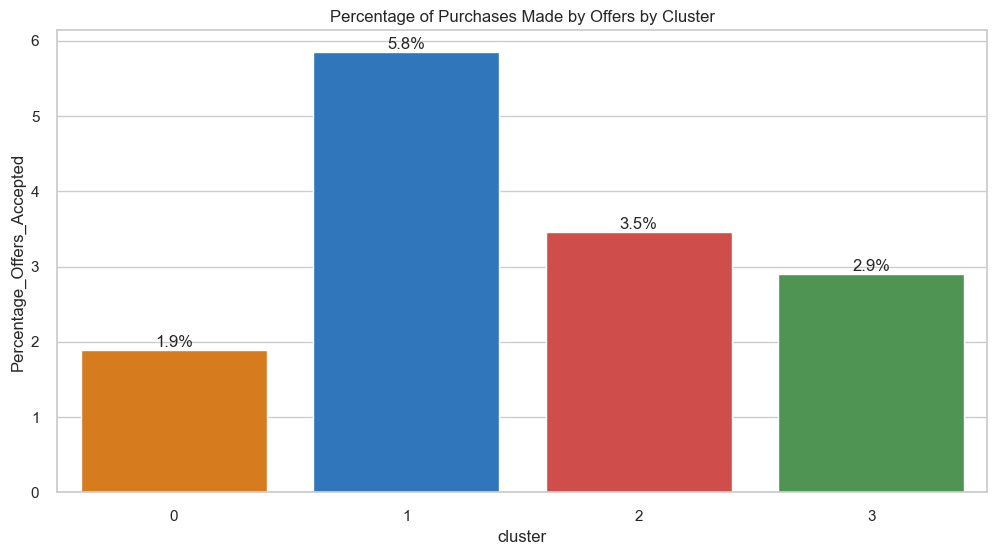

In [47]:
# Aggregate the data by cluster and sum the Offers_Accepted and Total_Purchases columns
agg_data = campaign_data.groupby('cluster')[['Offers_Accepted', 'Total_Purchases']].sum().reset_index()
 
# Calculate the percentage of purchases made by offers for each cluster
agg_data['Percentage_Offers_Accepted'] = (agg_data['Offers_Accepted'] / agg_data['Total_Purchases']) * 100
 
# Create the barplot with percentage of purchases made by offers for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Percentage_Offers_Accepted", data=agg_data, palette=mycolormap)
ax.set_title("Percentage of Purchases Made by Offers by Cluster")
 
for i, row in agg_data.iterrows():
    label = "{:.1f}%".format(row['Percentage_Offers_Accepted']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Percentage_Offers_Accepted']), ha='center', va='bottom', fontsize=12)
 
plt.show()

**_Insights: Percentage of purchases made through the campaign offers_**

*Cluster 1 has the highest percentage of purchases made by offers (5.8%), indicating that customers in this segment are more inclined to buy products when offered promotions. The marketing team should emphasize promotional campaigns for customers in Cluster 1.*

**4.Number of deals purchased with a discount**

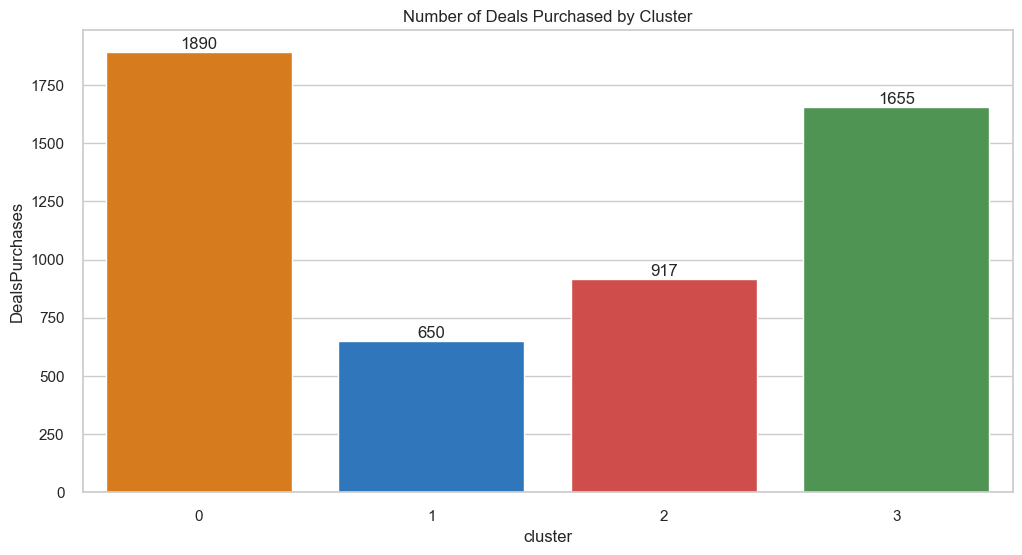

In [48]:
# Aggregate the data by cluster and sum the Deals Purchases column
agg_data = campaign_data.groupby('cluster')['DealsPurchases'].sum().reset_index()
 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="DealsPurchases", data=agg_data, palette=mycolormap)
ax.set_title("Number of Deals Purchased by Cluster")
 
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['DealsPurchases']}", (i, row['DealsPurchases']), ha='center', va='bottom', fontsize=12)
 
plt.show()

**5. Percentage of purchases made with discounts for each cluster**

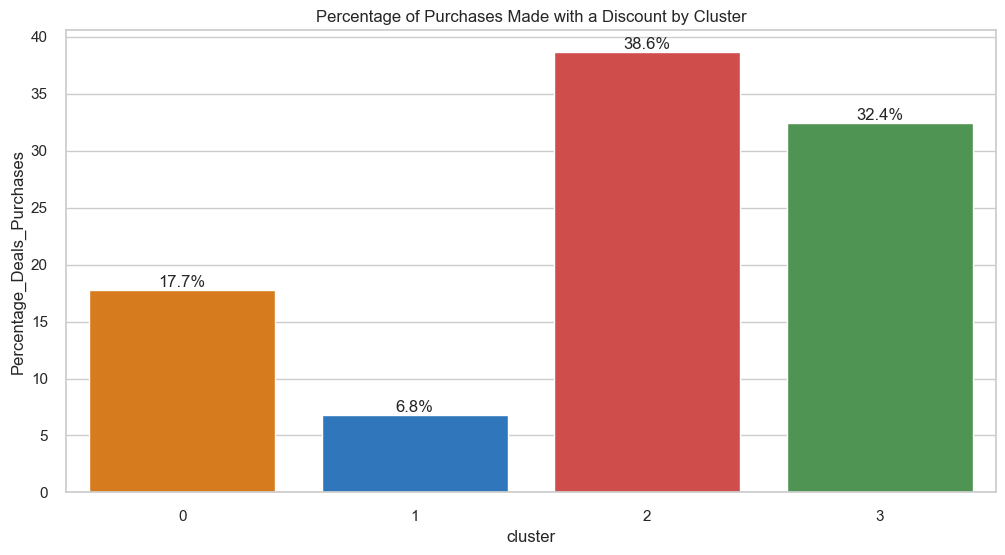

In [49]:
# Aggregate the data by cluster and sum the NumDealsPurchases and Total_Purchases columns
agg_data = campaign_data.groupby('cluster')[['DealsPurchases', 'Total_Purchases']].sum().reset_index()
 
# Calculate the percentage of purchases made with a discount for each cluster
agg_data['Percentage_Deals_Purchases'] = (agg_data['DealsPurchases'] / agg_data['Total_Purchases']) * 100
 
# Create the barplot with percentage of purchases made with a discount for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Percentage_Deals_Purchases", data=agg_data, palette=mycolormap)
ax.set_title("Percentage of Purchases Made with a Discount by Cluster")
 
for i, row in agg_data.iterrows():
    label = "{:.1f}%".format(row['Percentage_Deals_Purchases']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Percentage_Deals_Purchases']), ha='center', va='bottom', fontsize=12)
 
plt.show()

**_Insights: Number of deals purchased with a discount and Percentage of purchases made with discounts for each cluster_**

*There is a relationship between customers' income levels and their responsiveness to discounts. Cluster 2, with the lowest average income, has the highest percentage of purchases made with discounts (38.6%). In contrast, Cluster 1, with the highest average income, has the lowest rate of purchases made with discounts (6.8%). This suggests that lower-income customers are more sensitive to price and are more likely to respond to discount offers.*

*The marketing team should consider segmenting promotions based on the identified patterns. For higher-income customers (Cluster 1 and Cluster 0), focus on promo campaigns on premium products. For lower-income customers (Cluster 2 and potentially Cluster 3), focus on offering more deals and affordable options to incentivize spending.*

**6. Total spend by each cluster**

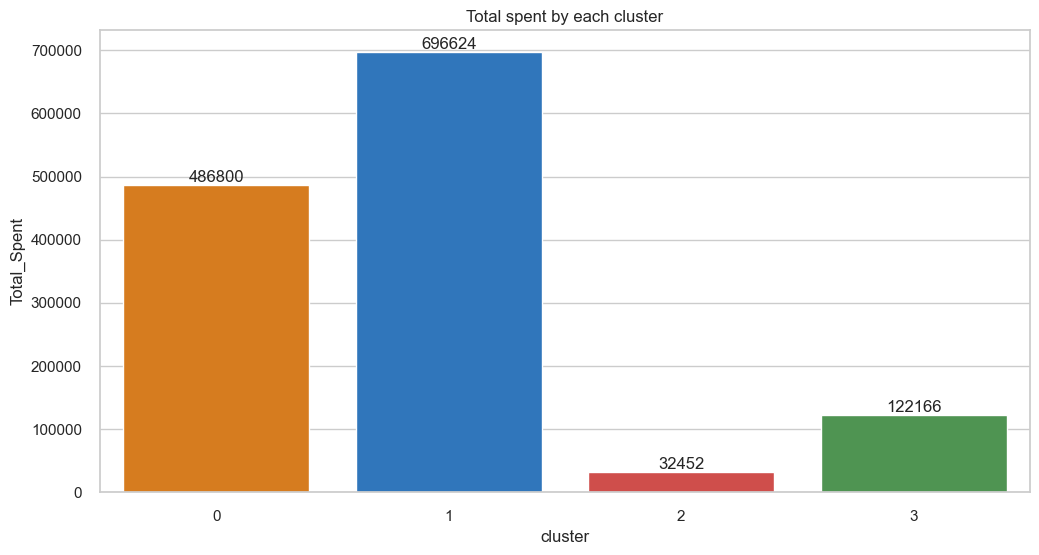

In [50]:
# Aggregate the data by cluster and get total spent by each cluster
agg_data = campaign_data.groupby('cluster')['Total_Spent'].sum().reset_index()
 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Total_Spent", data=agg_data, palette=mycolormap)
ax.set_title("Total spent by each cluster")
 
# Add labels to the bars
for i, row in agg_data.iterrows():
    ax.annotate(f"{row['Total_Spent']}", (i, row['Total_Spent']), ha='center', va='bottom', fontsize=12)
 
plt.show()

**7. Percentage spent by each cluster from the total spent in the store**

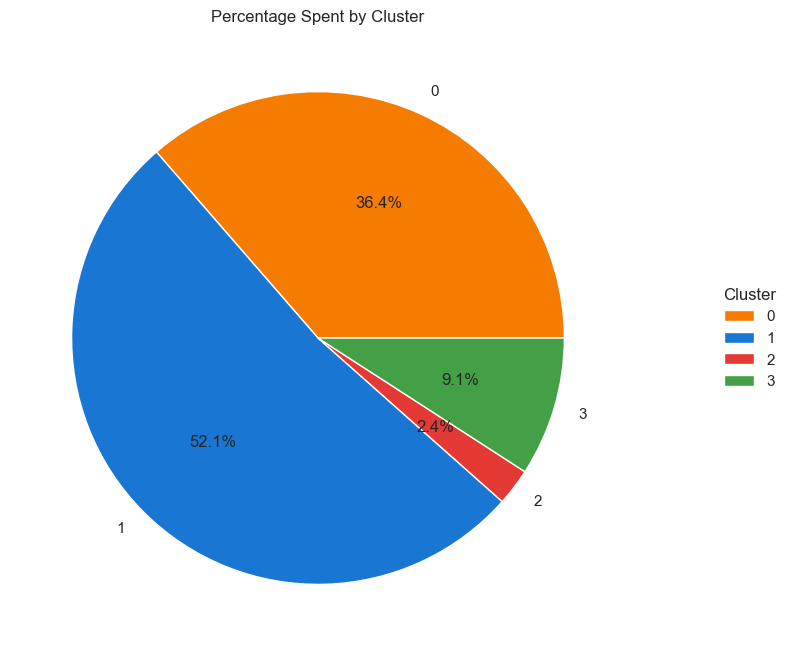

In [51]:
# Aggregate the data by cluster and get the total spent by each cluster
agg_data = campaign_data.groupby('cluster')['Total_Spent'].sum().reset_index()
 
# Calculate the percentage spent for each cluster
agg_data['Percentage_Spent'] = agg_data['Total_Spent'] / agg_data['Total_Spent'].sum() * 100
 
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(agg_data['Percentage_Spent'], labels=agg_data['cluster'], autopct='%1.1f%%', colors=mycolormap)
plt.title('Percentage Spent by Cluster')
 
#Create legend
plt.legend(agg_data['cluster'], title='Cluster', loc='center', bbox_to_anchor=(1.2, 0.5))
 
plt.show()

**8. Average spent per purchase by cluster**

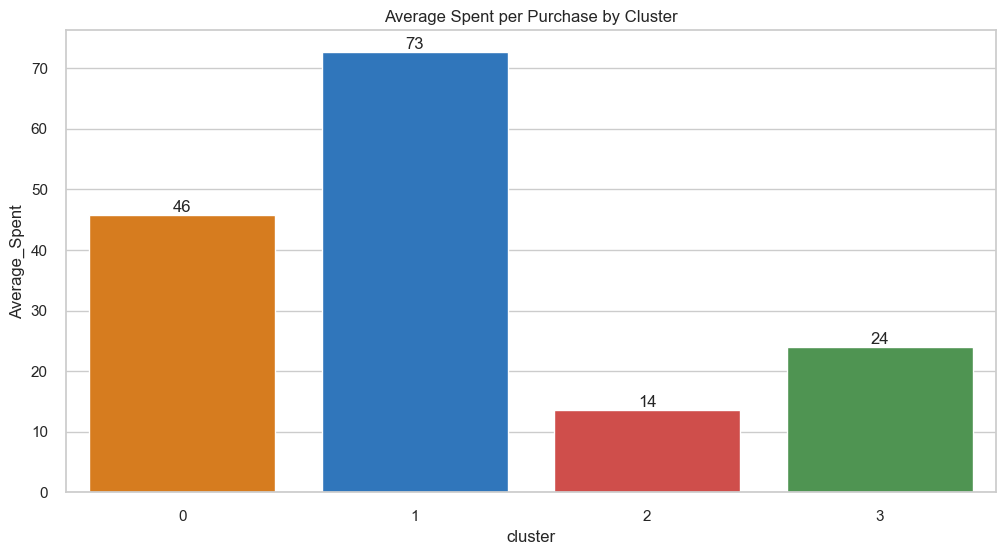

In [52]:
# Aggregate the data by cluster and get average spent per purchase by cluster
agg_data = campaign_data.groupby('cluster')[['Total_Spent', 'Total_Purchases']].sum().reset_index()
 
# Calculate the average Spent per purchase for each cluster
agg_data['Average_Spent'] = agg_data['Total_Spent'] / agg_data['Total_Purchases']
 
# Create the barplot with average Spent per purchase for each cluster
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Average_Spent", data=agg_data, palette=mycolormap)
ax.set_title("Average Spent per Purchase by Cluster")
 
for i, row in agg_data.iterrows():
    label = "{:.0f}".format(row['Average_Spent']) # format label as percentage with 1 decimal place
    ax.annotate(label, (i, row['Average_Spent']), ha='center', va='bottom', fontsize=12)
 
 
plt.show()

**_Insights: Total Spent by each cluster, Percentage Spent for each cluster from the total Spent in the store, and Average Spent per purchase by cluster insights._**

*The total Spent data highlights significant differences between the clusters, with Cluster 1 and  0 accounting for 86.5% of the total Spent. It is interesting to note that Cluster 1 has a much higher average Spent per customer (almost 2x) compared to Cluster 0, contributing to 52.1% of the total Spent. This suggests that customers in Cluster 1 are more valuable in revenue generation and are more likely to accept promotions. Therefore, they are ideal customers for the store.*

**9. Percentage of purchases for each cluster by the place of purchase**

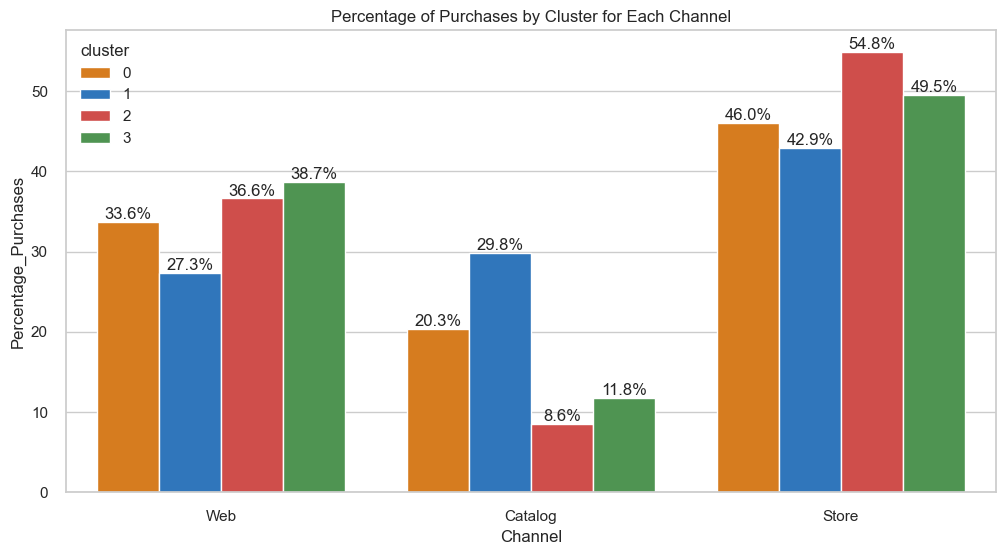

In [53]:
# Channels
channel = ['Web', 'Catalog', 'Store']
 
# Aggregate the acceptance data by cluster
agg_data = campaign_data.groupby('cluster')[channel].sum().reset_index()
 
# Calculate the percentage of purchases coming from each channel for each cluster
agg_data[channel] = agg_data[channel].div(agg_data[channel].sum(axis=1), axis=0) * 100
 
# Melt the aggregated data to make it suitable for plotting with seaborn
melted_data = pd.melt(agg_data, id_vars='cluster', value_vars=channel,
                      var_name='Channel', value_name='Percentage_Purchases')
 
# Create the barplot with cluster hue
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Channel", y="Percentage_Purchases", hue="cluster", data=melted_data, palette=mycolormap)
ax.set_title("Percentage of Purchases by Cluster for Each Channel")
 
# Add value labels to the bars
for i, p in enumerate(ax.patches):
    value = agg_data.iloc[int(i/3), int(i%3)+1].round(1).astype(str) + '%'
    ax.annotate(value, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12)
 
 
plt.show()

**_Insights: Percentage of purchases for each cluster by the place of purchase_**

*Cluster 3 and Cluster 4 exhibit a higher percentage of web channel purchases (38.7% and 36.6%, respectively) compared to Cluster 1 (27.3%) and Cluster 0 (33.6%). On the other hand, Cluster 1 has the highest percentage of catalog purchases at 29.8%, followed by Cluster 0 at 20.3%.*

*Store purchases are the most common channel for all clusters, with Cluster 2 having the highest percentage of in-store purchases at 54.8%. Cluster 3 and Cluster 0 follow closely with 49.5% and 46%, respectively, while Cluster 1 has the lowest store purchase percentage at 42.9%.*

*It is worth noting that the more buying power customers have, the less likely they are to purchase in-store. Therefore, if the marketing team wants to increase promotion acceptance and revenue for the store, they should focus on offering campaigns through the catalog.*

**10. Average number of web visits per month for each cluster**

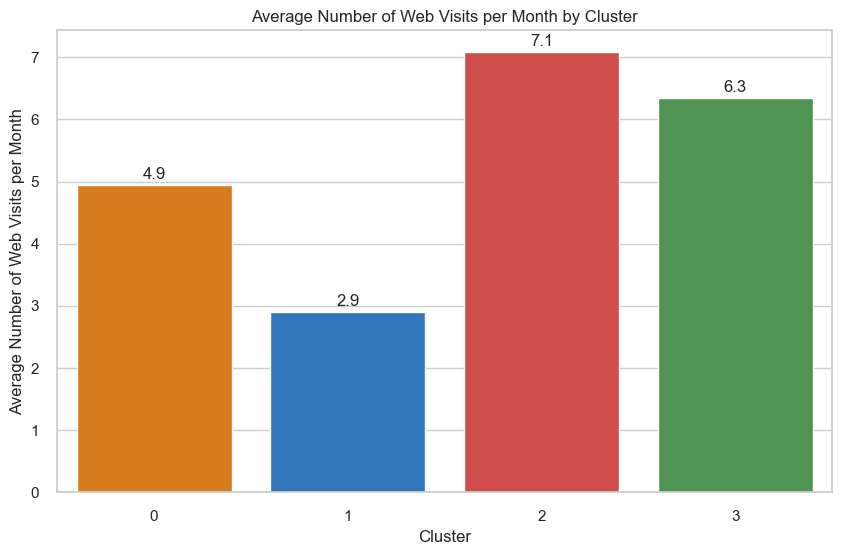

In [54]:
# Calculate the average number of web visits per month for each cluster
avg_num_visits_per_month = campaign_data.groupby('cluster')['WebVisits'].mean()
 
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_num_visits_per_month.index, y=avg_num_visits_per_month, palette=mycolormap)
plt.title("Average Number of Web Visits per Month by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Number of Web Visits per Month")
# Annotate the bars with their values
for i, v in enumerate(avg_num_visits_per_month):
    plt.text(i, v+0.1, str(round(v, 1)), ha='center', fontsize=12)
 
plt.show()

**11. Average web conversion rate for each cluster**

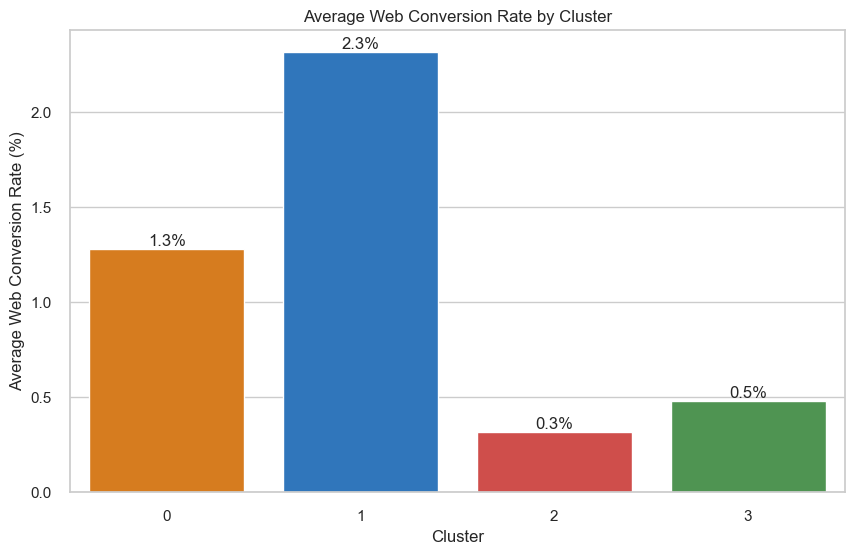

In [55]:
# Calculate the average WebConversionRate for each cluster
web_conversion_rate = campaign_data.groupby('cluster')['WebConversionRate'].mean()
 
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=web_conversion_rate.index, y=web_conversion_rate, palette=mycolormap)
plt.title("Average Web Conversion Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Web Conversion Rate (%)")
 
# Annotate the bars with their values and percentage symbols
for i, v in enumerate(web_conversion_rate):
    plt.text(i, v+0, str(round(v, 1)) + '%', ha='center', va='bottom', fontsize=12)
 
plt.show()

**_Insights: Average number of visits per month for each cluster and Average web conversion rate for each cluster insights._**

*Cluster 1 has the highest average conversion rate (2.32%) among all clusters, significantly higher than the others. Interestingly, this cluster also has the lowest average number of web visits per month (2.90). This indicates that customers in this cluster are more likely to convert during their relatively few visits to the website. It would be worthwhile for the marketing team to explore the characteristics of this group to understand better what drives their high conversion rate and apply those learnings to other customer segments.*

*Clusters 2 and 3 have the lowest average conversion rates (0.32% and 0.48%, respectively). However, they have the highest average number of web visits per month (7.08 and 6.34, respectively). This suggests that customers in these clusters may browse the website more frequently but are less likely to purchase. The marketing team should investigate factors hindering conversions in these clusters, such as product offerings, pricing, or user experience.*

**12. Spending by cluster for each category**

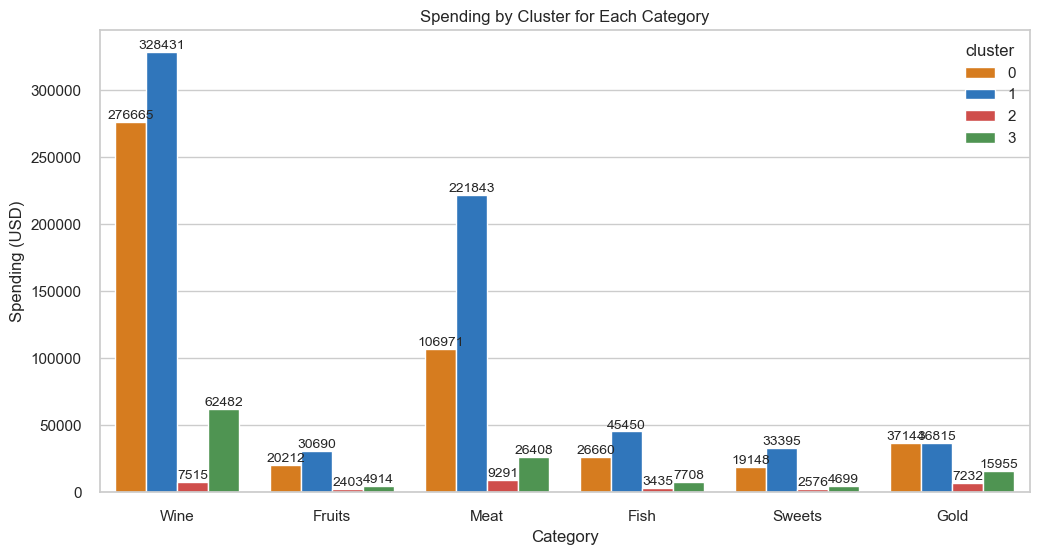

In [56]:
# List of product categories
categories = ['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
 
# Aggregate the Spending data by cluster
agg_data = campaign_data.groupby('cluster')[categories].sum().reset_index()
 
# Melt the aggregated data to make it suitable for plotting with seaborn
melted_data = pd.melt(agg_data, id_vars='cluster', value_vars=categories,
                      var_name='Category', value_name='Spending')
 
# Create the barplot with cluster hue
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Category", y="Spending", hue="cluster", data=melted_data, palette=mycolormap)
ax.set_title("Spending by Cluster for Each Category")
ax.set_ylabel("Spending (USD)")
 
# Add the Spending values as text labels on each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
 
plt.show()

**_Insights: Spending by cluster for each category_**

*A review of the spending habits across product categories for each cluster shows that wine is the highest spending category for all groups. Cluster 1 spends the most on wine at 328,431, followed by Cluster 0 at 276,665, Cluster 3 at 62,482, and Cluster 2 at 7,515.*

*For other categories, Cluster 1 consistently spends the most, with significant spending on meat (221,843), followed by fish (45,450), gold (36,815), fruits (30,690), and sweets (33,395). On the other hand, Cluster 3 consistently spends the least across all categories.*

*Based on these insights, the marketing team can tailor their promotional efforts by focusing on wine for all clusters while emphasizing other categories for specific groups. For instance, Cluster 1 may respond well to promotions on meat, fish, gold, fruits, and sweets. Additionally, the team could explore strategies to increase spending in all categories for Cluster 3, as they currently have the lowest spending levels among the groups.*

**13. Number of accepted promo campaigns by each cluster**

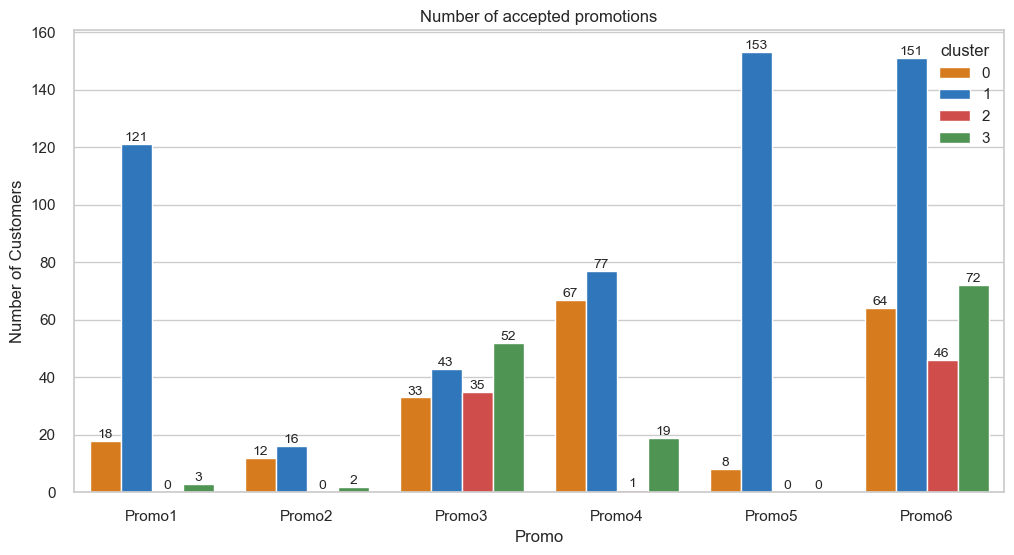

In [57]:
# List of promo campaigns
promos = ['Promo1', 'Promo2', 'Promo3', 'Promo4', 'Promo5', 'Promo6']
 
# Aggregate the acceptance data by cluster
agg_data = campaign_data.groupby('cluster')[promos].sum().reset_index()
 
# Melt the aggregated data to make it suitable for plotting with seaborn
melted_data = pd.melt(agg_data, id_vars='cluster', value_vars=promos,
                      var_name='Promo', value_name='Num_Customers')
 
# Create the barplot with cluster hue
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Promo", y="Num_Customers", hue="cluster", data=melted_data, palette=mycolormap)
ax.set_title("Number of accepted promotions")
ax.set_ylabel("Number of Customers")
 
# Add the number of accepted promos as text labels on each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
 
plt.show()

**_Insights: Number of accepted promo campaigns by each cluster_**

*The most efficient was promotion number 6. On promotions #1, #5, and #6, clients from cluster 1 reacted the most. While promotions #3 and #6 were accepted by all customers. The marketing team should launch more campaigns similar to Promo #6 and target customers from Cluster 1 with similar promotions to promos #1 and #5.*

**14. Complains raised by each cluster**

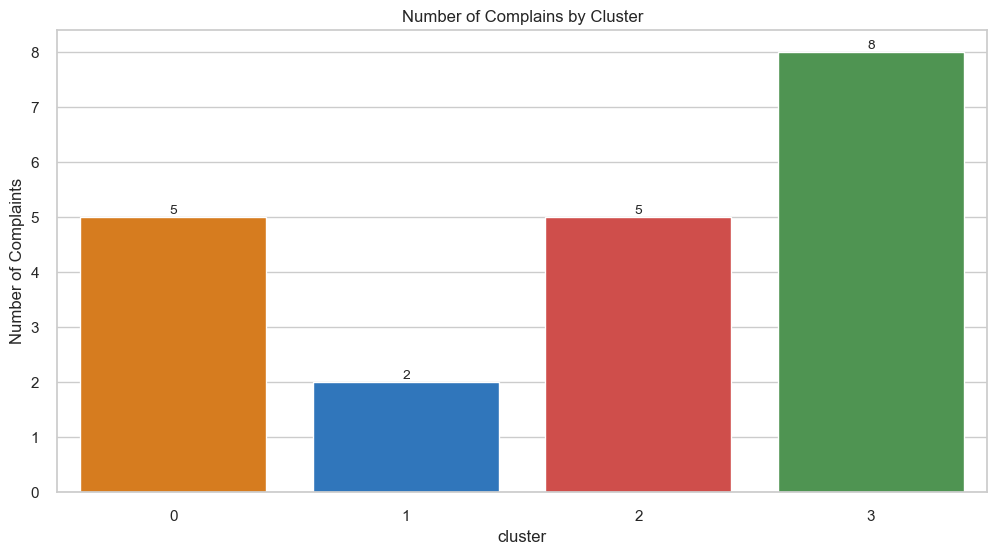

In [58]:
# Aggregate the data by cluster and sum the Complain column
agg_data = campaign_data.groupby('cluster')['Complain'].sum().reset_index()
 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="cluster", y="Complain", data=agg_data, palette=mycolormap)
ax.set_title("Number of Complains by Cluster")
ax.set_ylabel("Number of Complaints")
 
# Add the number of complaints as text labels on each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
 
plt.show()

**_Insights: Complains raised by each cluster_**

*There are only a few complaints from more than 2000 clients. That indicates that the store is functioning well.*

**15. Recency distribution by each cluster**

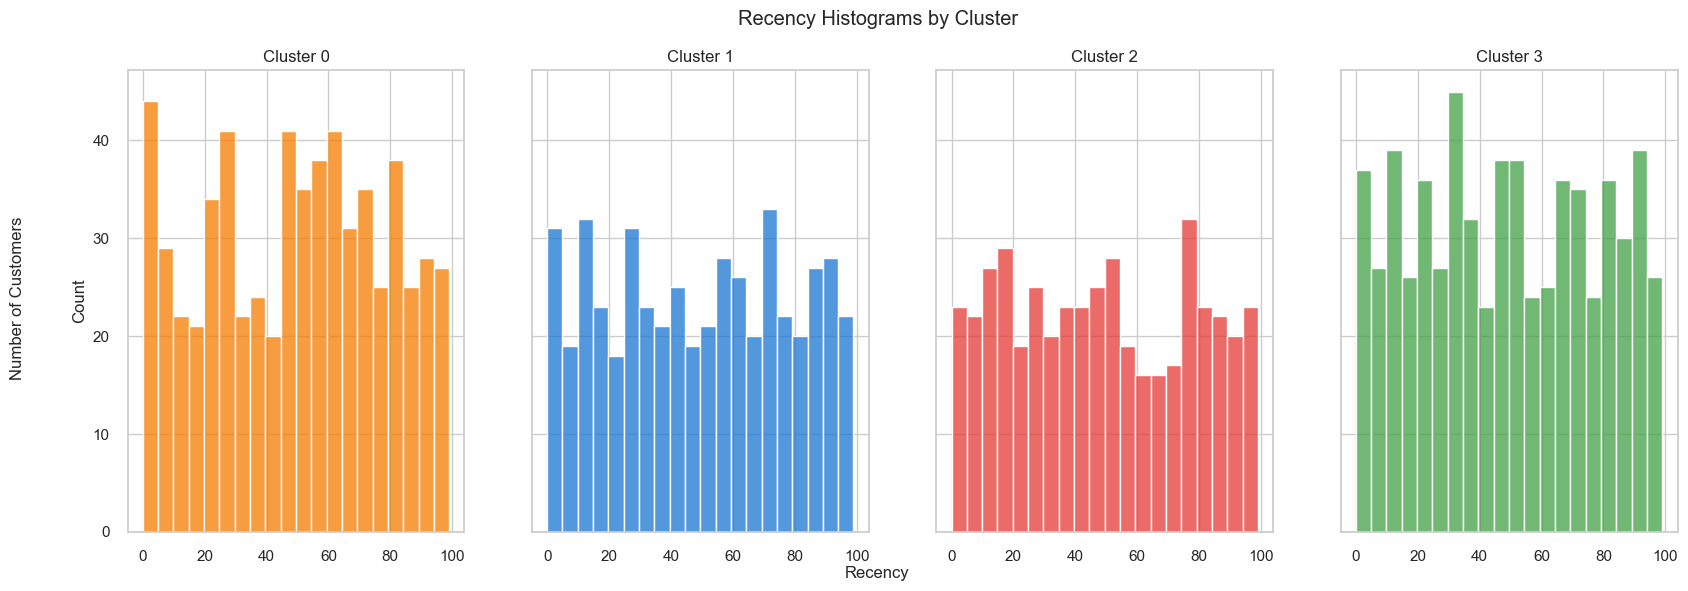

In [59]:
# Set the style
sns.set(style="whitegrid")
 
# Create a figure with four subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
 
# Set common titles and labels
fig.suptitle("Recency Histograms by Cluster")
fig.text(0.5, 0.04, 'Recency', ha='center', va='center')
fig.text(0.07, 0.5, 'Number of Customers', ha='center', va='center', rotation='vertical')
 
# Define the cluster list
clusters = [0, 1, 2, 3]
 
# Plot the Recency histograms for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = campaign_data[campaign_data['cluster'] == cluster]
    sns.histplot(data=cluster_data, x='Recency', bins=20, color=mycolormap[cluster], ax=axes[i], kde=False)
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xlabel("")
 
# Display the plots
plt.show()

**16. Customer tenure analysis**

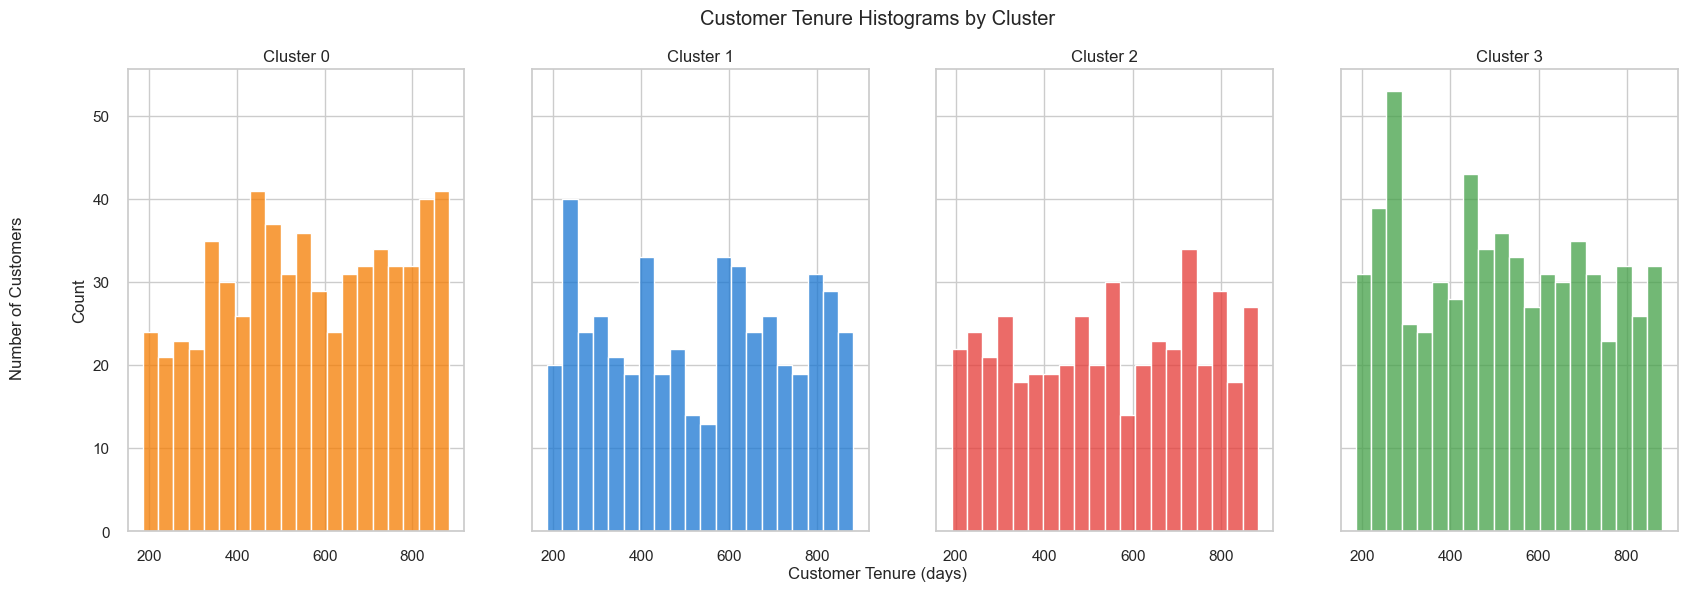

In [60]:
# Set the style
sns.set(style="whitegrid")
 
# Create a figure with four subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
 
# Set common titles and labels
fig.suptitle("Customer Tenure Histograms by Cluster")
fig.text(0.5, 0.04, 'Customer Tenure (days)', ha='center', va='center')
fig.text(0.07, 0.5, 'Number of Customers', ha='center', va='center', rotation='vertical')
 
# Define the cluster list
clusters = [0, 1, 2, 3]
 
# Plot the Customer Tenure histograms for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = campaign_data[campaign_data['cluster'] == cluster]
    sns.histplot(data=cluster_data, x='Customer_For', bins=20, color=mycolormap[cluster], ax=axes[i], kde=False)
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xlabel("")
 
# Display the plots
plt.show()

**_Insights: Recency distribution by each cluster and Customer tenure analysis insights._**

*The distribution of recency and tenure appears to be relatively uniform across all of the clusters, which suggests that there may not be any meaningful patterns or insights to be gleaned from this particular analysis.*

#### 7. Report

**Social-demographic analysis**

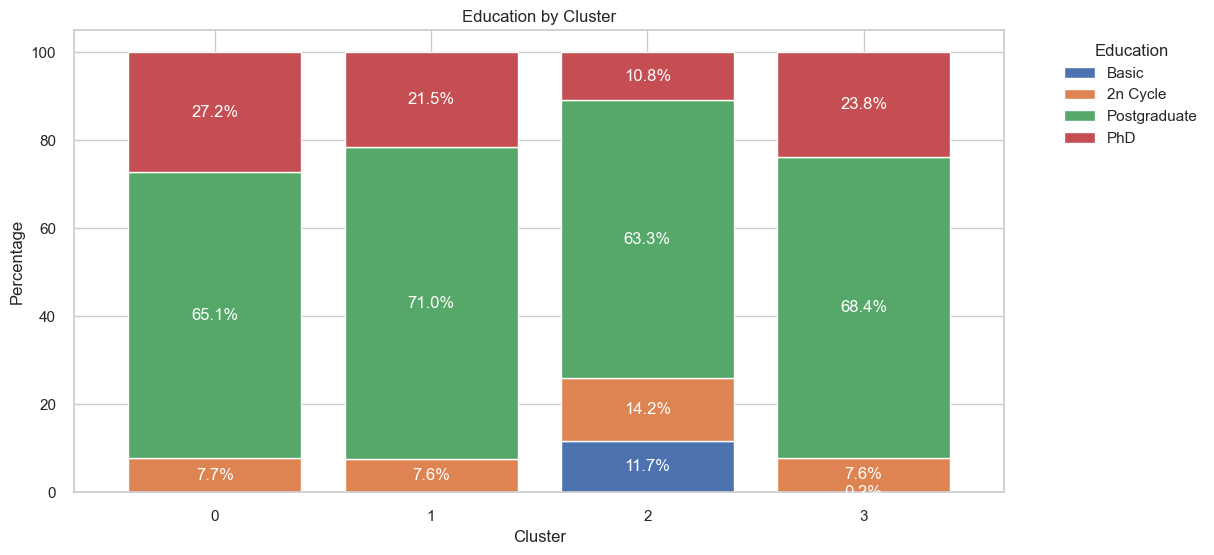

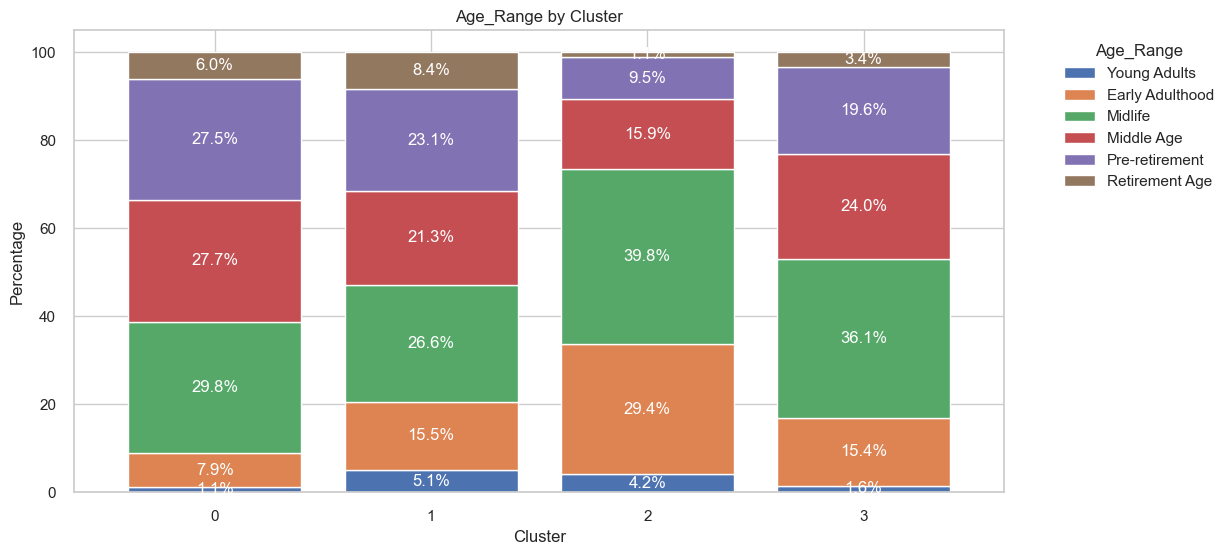

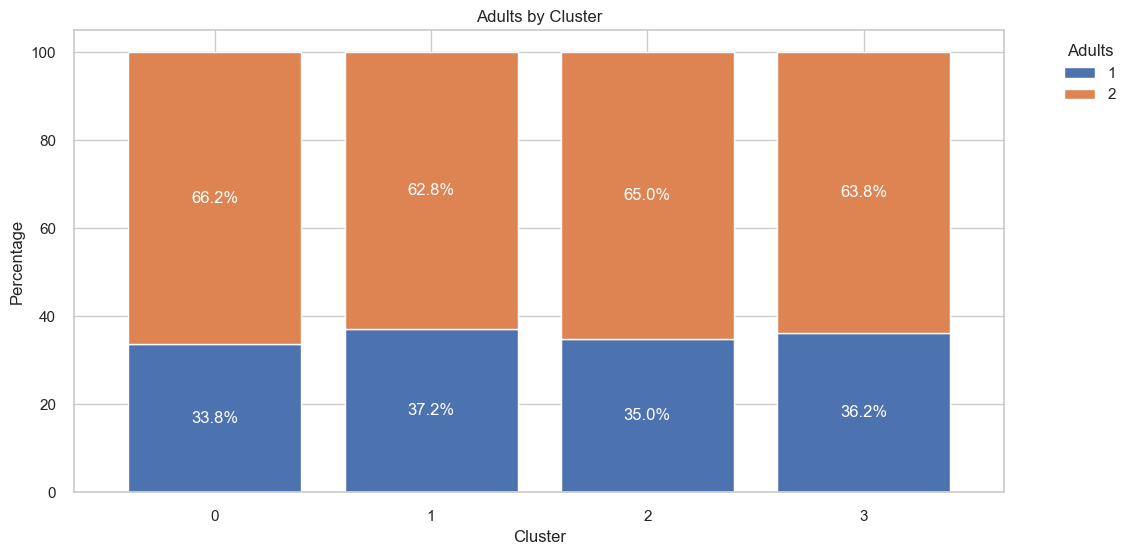

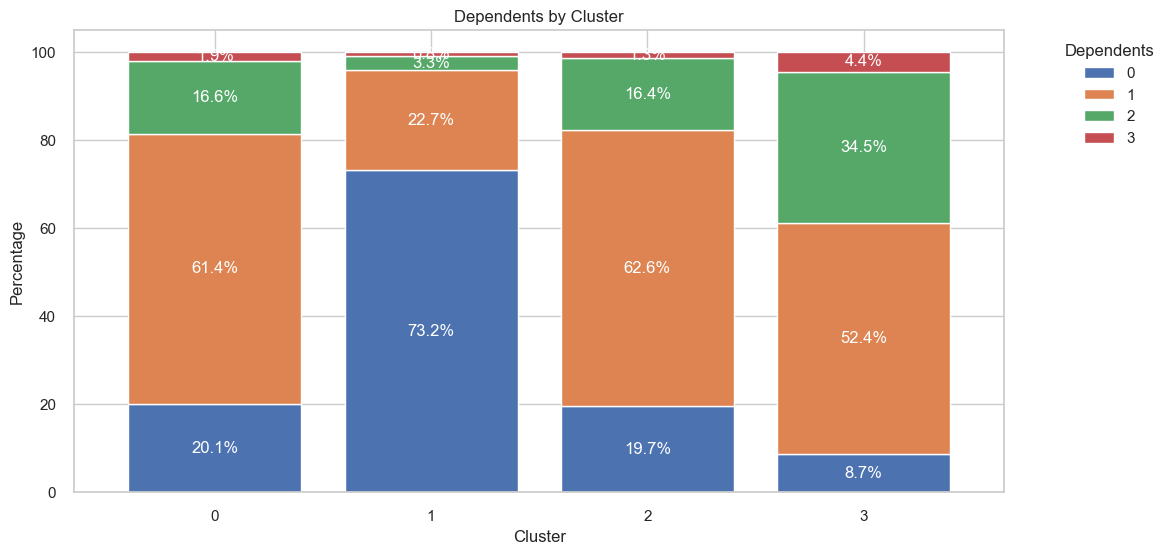

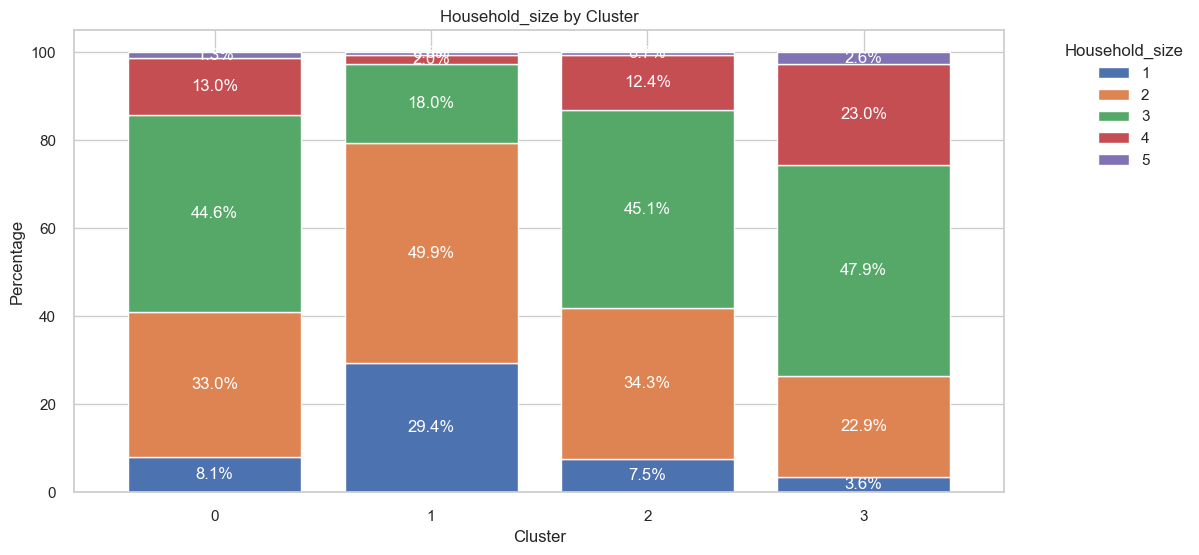

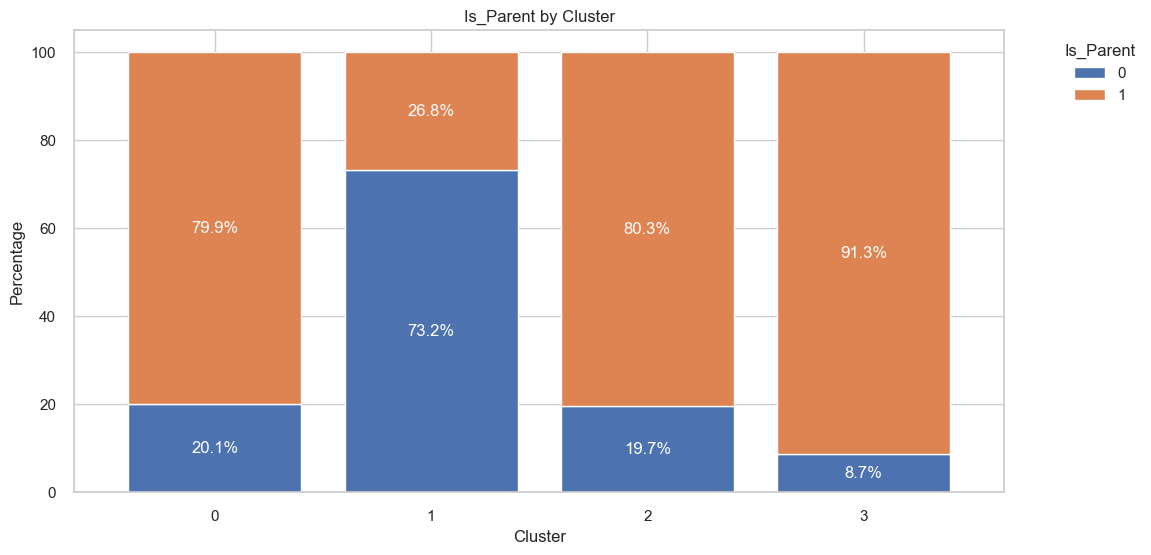

In [61]:
# Create list of features for what to create visualizations 
personal_variables = ['Education', 'Age_Range', 'Adults', 'Dependents', 'Household_size', 'Is_Parent']
 
# Create an order for age groups
age_order = ['Young Adults', 'Early Adulthood', 'Midlife', 'Middle Age', 'Pre-retirement', 'Retirement Age']
 
for var in personal_variables:
    # Aggregate the data by cluster and the current variable
    var_agg = campaign_data.groupby(['cluster', var]).size().reset_index(name='count')
    
    if var == 'Education':
        # Sort the education levels in the desired order
        education_order = ['Basic', '2n Cycle', 'Postgraduate', 'PhD']
        var_agg[var] = pd.Categorical(var_agg[var], categories=education_order, ordered=True)
        var_agg = var_agg.sort_values(var)
    elif var == 'Age_Range':
        # Sort the age ranges in the desired order
        var_agg[var] = pd.Categorical(var_agg[var], categories=age_order, ordered=True)
        var_agg = var_agg.sort_values(var)
        
    # Calculate the total count of customers per cluster
    cluster_totals = var_agg.groupby('cluster')['count'].sum()
 
    # Calculate the percentage of each category for each cluster
    var_agg['percentage'] = var_agg.apply(lambda row: row['count'] / cluster_totals[row['cluster']] * 100, axis=1)
 
    # Pivot the aggregated data to create a matrix suitable for stacked bar chart
    var_pivot = var_agg.pivot_table(index='cluster', columns=var, values='percentage', fill_value=0)
 
    # Plot the stacked bar chart
    ax = var_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='white', width=0.8)
    plt.title(f"{var} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Percentage")
    plt.xticks(rotation=0)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
 
    # Add annotations to the chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white', fontsize=12)
 
    plt.show()

**_Analysing social-demographic avatar, you can conclude a few interesting observations:_**

*Clusters 0, 1, and 3 have more customers with Postgraduate and Ph.D. degrees, indicating a more educated clientele.*

*Cluster 1 has a high representation of younger individuals (Young Adults and Early Adulthood) and a majority without dependents. Cluster 2 has the highest representation of younger individuals (Young Adults and Early Adulthood) and many with basic education.*

*Clusters 2 and 3 have a higher percentage of parents.*

*Cluster 3 stands out due to its high percentage of parents (91.29%) and larger households, while Cluster 1 has the lowest percentage of parents.*

**REPORT**

**Title: Optimizing Customer Segmentation for Effective Promo Campaigns**

**Executive Summary:**

*Customer data analysis has identified four distinct customer clusters with varying responsiveness to promotional campaigns. The primary goal is to provide the marketing team with insights into these clusters to tailor their promotional efforts effectively. Our ideal target customer is in Cluster 1, which contributes significantly to overall revenue and has the highest acceptance rate of promotional offers. The marketing team should promote wine and meat categories, leverage the catalog and adjust web offers to increase interest for clients in Cluster 1 to visit the website more often. Analyze Promo campaigns 1, 5, and 6 and target with similar campaign clients from cluster 1 or offer more campaigns like 6 to all customers.*

**Detailed Findings:**

**_1. Targeting the Ideal Customer - Cluster 1:_**

Cluster 1, which accounts for 56.5% of all accepted offers and 52.1% of total spending, is our ideal target group. Customers in this cluster have higher average incomes and high education levels and are predominantly adults in their midlife without dependents.

**_Recommendations:_**

Focus promotional campaigns on Cluster 1 customers, who are more likely to accept offers and contribute significantly to store revenue.

Analyze the characteristics of Cluster 1 customers (e.g., demographics, preferred products, and communication channels) to tailor promotional strategies for other customer segments.

**_2. Leveraging High-spend Categories:_**

Wine and meat are the highest spending categories for all clusters. Targeting these high-spend categories can increase overall revenue.

**_Recommendations:_**

Prioritize wine and meat promotions for all clusters.

**_3. Optimizing Marketing Channels:_**

Catalog purchases are popular among Cluster 1 customers (29.8%), while Cluster 3 and 4 prefer web channel purchases (38.7% and 36.6%). In-store purchases are most common among Cluster 2 customers (54.8%).

**_Recommendations:_**

Increase catalog promotions targeting Cluster 1 customers.

Enhance the web channel experience and advertisements targeting Cluster 3 and 4 customers.

Explore in-store deals opportunities for Cluster 2 customers.

**_4. Improving Website Efficiency:_**

Cluster 2 and 3 customers visit the website more frequently but have lower conversion rates. This indicates potential barriers to conversion, such as product offerings, pricing, or user experience. Customers from Cluster 1 have a high website conversion rate but the lowest number of monthly visits. That tells that customers from Cluster 1 either can't find relevant offers through the website or are not aware of it enough, or not happy about their experience.   

**_Recommendations:_**

Conduct user experience research and A/B testing for customers in Clusters 2 and 3 to identify potential barriers to conversion.

Experiment with different website layouts, product recommendations, and personalized promotions to improve conversion rates for these clusters.

Find out why customers from Cluster 1 only visit the website sparingly. It can be a massive booster to revenue since they have the highest website conversion rate.

**_5. Tailoring Promotions Based on Income and Education:_**

Lower-income customers (Cluster 2) are more sensitive to price and likely to respond to discount offers. In contrast, higher-income customers (Cluster 1) tend to accept promo campaigns on premium products.

**_Recommendations:_**

For lower-income customers (Cluster 2 and potentially Cluster 3), focus on offering more deals and affordable options to incentivize spending.

For higher-income customers (Cluster 1 and Cluster 0), focus on promo campaigns on premium products.

**_6. Emulating Successful Promotions:_**

Promotion #6 was the most efficient, with high customer acceptance rates, especially Cluster 1. Implement similar campaigns to increase overall promotional efficiency.

**_Recommendations:_**

Launch more campaigns similar to Promo #6, targeting all customers.

Study the features of Promo #1 and #5, which were successful with Cluster 1 customers, and apply those learnings to future campaigns